## 소프트맥스 회귀(Softmax Regression)
- 소프트맥스 회귀(Softmax Regression): 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한
- https://wikidocs.net/35476

###  다중 클래스 분류(Multi-class Classification)
- 다중 클래스 분류: 세 개 이상의 선택지 중 하나를 고르는 문제
- ex. 붖꽃 품종 예측
    - 3개의 품종(setosa, versicolor, virginica) 중 어떤 품종인지를 예측하는 문제
    - 기존 시그모이드: setosa가 정답일 확률은 0.8, versicolor가 정답일 확률은 0.2, virginica가 정답일 확률은 0.4 등과 같은 출력
    - 소프트맥스 함수: setosa일 확률이 0.7, versicolor일 확률 0.05, virginica일 확률이 0.25
        - 세 개의 확률의 총 합이 1인 예측값을 얻도록 하는 것
        - 확률값이 가장 높은 setosa로 예측

### 소프트맥스 함수(Softmax function)
- 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정

#### 소프트맥스 함수의 이해
- k차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률 pi
- 소프트맥스 함수는 pi를 다음과 같이 정의
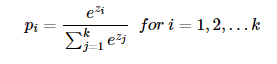
- ex. 붖꽃 품종 예측
    - k=3, 3차원 벡터 z=[z1, z2, z3]
    - 소프트맥스 함수 다음과 같이 출력
    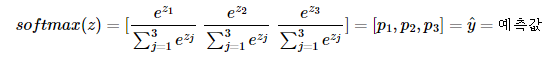
    - p1, p2, p3 각각은 1번, 2번, 3번 클래스가 정답일 확률을 나타냄 ( virginica일 확률, setosa일 확률, versicolor일 확률)
    - 각각 0과 1사이의 값
    - 총 합은 1

#### 그림을 통한 이해
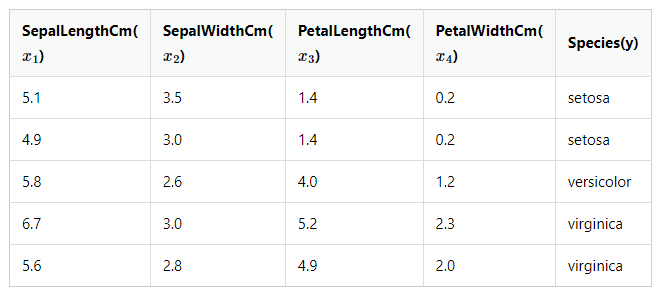
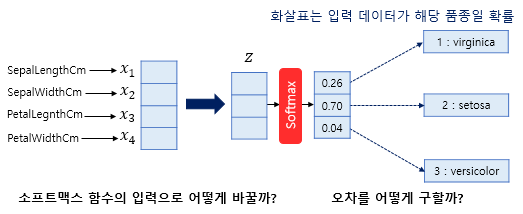
- 소프트맥스 함수의 입력에 대한 의문
    - 4개의 독립변수 x를 가지는데, 이는 모델이 4차원 벡터를 입력으로 받음을 의미
    - 소프트맥스의 함수는 입력으로 사용되는 벡터는, 벡터의 차원이 분류하고자 하는 클래스의 개수 (여기서는 3개의 품종이기 때문에 3개)
    - 3차원 벡터를 z로 표현
    - 샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법
        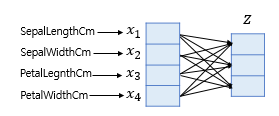
        - 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행
        - 위 그림의 경우, 화살표는 총 (4 × 3 = 12) 12개, 전부 다른 가중치
        - 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됨
- 오차 계산 방법에 대한 의문
    - 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터
        - 각 원소는 0과 1사이의 값을 가짐
        - 각각은 특정 클래스가 정답일 확률을 나타냄
        - 예측값과 비교를 할 수 있는 실제값의 표현 방법 -> 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현
        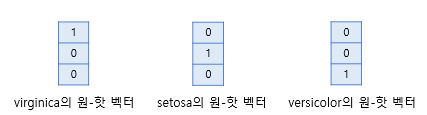
        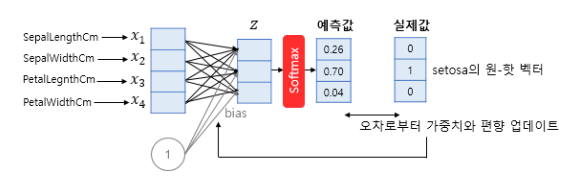
        - 두 벡터의 오차를 계산하기 위해, 소프트맥스 회귀는 비용함수로 크로스 엔트로피 함수를 사용
        - 오차로부터 가중치 업데이트 (선형회귀나 로지스틱 회귀와 마찬가지)
- 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현
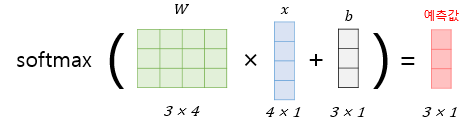
    - 4는 특성의 수이며 3은 클래스의 개수에 해당

### 원-핫 벡터의 무작위성
- 실제값 표현을 원-핫 벡터로 하는 이유: 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하기 때문에
- 정수 인코딩이 부적합한 이유
    - ex. Banana, Tomato, Apple라는 3개의 클래스에 정수 인코딩을 사용하여 각각 1, 2, 3을 부여
    - 손실 함수로 선형 회귀 실습에서 배운 평균 제곱 오차 MSE 사용
    - 실제값이 Tomato일때 예측값이 Banana이었다면 제곱 오차는 (2-1)^2=1
    - 실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 (3-1)^2=4
    - 즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큼
    - 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것
- 정수인코딩의 순서 정보가 도움이 되는 분류 문제
- ex. {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우
- 원-핫 벡터의 관계 무작위성
    - 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 함

### 비용 함수(Cost function)
- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용
- 크로스 엔트로피 함수, 표기 방법
#### 크로스 엔트로피 함수
- y는 실제값, k는 클래스의 개수로 정의
- yj는 실제값 원-핫 벡터의 j번째 인덱스를 의미, pj는 샘플데이터가 j번째 클래스일 확률
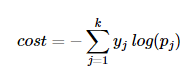
- 비용함수로 적합한 이유
    - c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 하면, pc=1는 y를 정확하게 예측하는 경우
    - 식에 대입해보면 -1log(1)=0 이기 때문에 크로스 엔트로피 함수의 값은 0이 됨
    - 즉, 크로스엔트로피 함수의 값을 ㄹ최소화하는 방향으로 학습해야함
    - n개의 전체 데이터에 대한 평균을 구한다고 하며, 최종 비용함수는 아래와 같음
    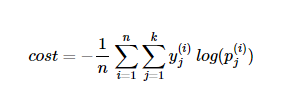

#### 이진 분류에서의 크로스 엔트로피 함수
- 로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식

### 인공 신경망 다이어그램
- n개의 특성을 가지고 m개의 클래스를 분류하는 소프트맥스 회귀
- 인공 신경망의 형태로 표현
- 소프트맥스 회귀 또한 하나의 인공 신경망으로 볼 수 있음
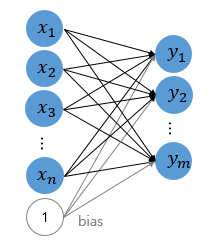